In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler


In [49]:
df=pd.read_csv('GE.csv')

In [65]:
df.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-14,110.239998,110.639999,107.279999,107.760002,107.403793,5678225
1,2021-06-15,107.599998,108.559998,106.480003,108.320000,107.961937,4753238
2,2021-06-16,108.000000,109.199997,106.320000,107.519997,107.164574,8766413
3,2021-06-17,107.279999,108.080002,103.279999,104.000000,103.656212,9626675
4,2021-06-18,102.720001,104.160004,102.000000,102.239998,101.902031,10258088
5,2021-06-21,103.120003,105.519997,102.879997,105.519997,105.171181,6744263
6,2021-06-22,104.959999,105.599998,103.519997,104.239998,103.895416,4783575
7,2021-06-23,104.160004,105.519997,103.519997,103.599998,103.257530,5459688
8,2021-06-24,104.480003,105.599998,103.360001,105.199997,104.852249,5977550
9,2021-06-25,105.279999,105.919998,104.800003,105.279999,105.011841,4264450


In [51]:
type(df.Date)

pandas.core.series.Series

In [52]:
train_dates=pd.to_datetime(df['Date'])

In [53]:
type(date)

pandas.core.series.Series

In [54]:
cols = list(df)[1:6]

In [55]:
df_for_training = df[cols].astype(float)

In [56]:
cols

['Open', 'High', 'Low', 'Close', 'Adj Close']

In [57]:
scaler = StandardScaler()

In [58]:
scaler = scaler.fit(df_for_training)

In [59]:
df_for_training_scaled = scaler.transform(df_for_training)

In [66]:
df_for_training_scaled

array([[ 1.42770409,  1.33661164,  1.25241916,  1.1791925 ,  1.16676744],
       [ 1.15017279,  1.11906682,  1.16872624,  1.23807076,  1.2259784 ],
       [ 1.1922232 ,  1.18600355,  1.15198726,  1.15395835,  1.14138979],
       ...,
       [-2.09925575, -2.04788211, -1.96558976, -2.03809487, -2.04165855],
       [-2.07823097, -2.17652592, -2.15076095, -2.28832887, -2.29414245],
       [-2.48506683, -2.58337627, -2.570274  , -2.66157587, -2.67074538]])

In [60]:
trainX=[]
trainY=[]
n_future = 1
n_past = 14


In [61]:
for i in range(n_past, len(df_for_training_scaled)-n_future+1):
    trainX.append(df_for_training_scaled[i-n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i+n_future - 1: i+n_future,0])
trainX,trainY = np.array(trainX),np.array(trainY)

In [62]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (238, 14, 5).
trainY shape == (238, 1).


In [63]:
trainX

array([[[ 1.42770409,  1.33661164,  1.25241916,  1.1791925 ,
          1.16676744],
        [ 1.15017279,  1.11906682,  1.16872624,  1.23807076,
          1.2259784 ],
        [ 1.1922232 ,  1.18600355,  1.15198726,  1.15395835,
          1.14138979],
        ...,
        [ 0.82218178,  0.83458506,  0.87579926,  0.85956644,
          0.85375829],
        [ 0.89787151,  1.0855984 ,  0.95112347,  1.17078108,
          1.16697229],
        [ 1.25950341,  1.16926976,  1.21057228,  1.18760308,
          1.18390183]],

       [[ 1.15017279,  1.11906682,  1.16872624,  1.23807076,
          1.2259784 ],
        [ 1.1922232 ,  1.18600355,  1.15198726,  1.15395835,
          1.14138979],
        [ 1.11653274,  1.06886461,  0.83395249,  0.78386545,
          0.76920362],
        ...,
        [ 0.89787151,  1.0855984 ,  0.95112347,  1.17078108,
          1.16697229],
        [ 1.25950341,  1.16926976,  1.21057228,  1.18760308,
          1.18390183],
        [ 1.22586336,  1.09396571,  1.16872624, 

In [64]:
trainY

array([[ 1.22586336e+00],
       [ 1.00720212e+00],
       [ 6.70800864e-01],
       [ 5.44649747e-01],
       [ 7.80131481e-01],
       [ 8.22181783e-01],
       [ 8.47411691e-01],
       [ 6.70800864e-01],
       [ 5.11009695e-01],
       [ 6.03520654e-01],
       [ 9.05077262e-02],
       [-6.08724570e-02],
       [ 5.95110404e-01],
       [ 8.13771638e-01],
       [ 6.03520654e-01],
       [ 4.85779787e-01],
       [ 1.04925243e+00],
       [ 8.97871506e-01],
       [ 9.31511664e-01],
       [ 9.06281756e-01],
       [ 8.22181783e-01],
       [ 3.72244045e-01],
       [ 5.41496193e-01],
       [ 6.66595739e-01],
       [ 7.04441021e-01],
       [ 7.25465804e-01],
       [ 7.51747177e-01],
       [ 1.00404846e+00],
       [ 1.00194627e+00],
       [ 1.03453496e+00],
       [ 7.95900410e-01],
       [ 6.18238118e-01],
       [ 4.64755004e-01],
       [ 3.51219262e-01],
       [ 3.08117390e-01],
       [ 4.14294347e-01],
       [ 4.86831252e-01],
       [ 7.04441021e-01],
       [ 8.2

In [26]:
model = Sequential()
model.add(LSTM(64, activation = 'relu', input_shape = (trainX.shape[1], trainX.shape[2]),return_sequences = True))
model.add(LSTM(32, activation = 'relu', return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

In [27]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 14, 64)            17920     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/5
14/14 [==============================] - 4s 61ms/step - loss: 0.3722 - val_loss: 1.3017
Epoch 2/5
14/14 [==============================] - 0s 22ms/step - loss: 0.1777 - val_loss: 101.0898
Epoch 3/5
14/14 [==============================] - 0s 21ms/step - loss: 0.1856 - val_loss: 8.0025
Epoch 4/5
14/14 [==============================] - 0s 21ms/step - loss: 0.1385 - val_loss: 6.7308
Epoch 5/5
14/14 [==============================] - 0s 19ms/step - loss: 0.1235 - val_loss: 8.0747


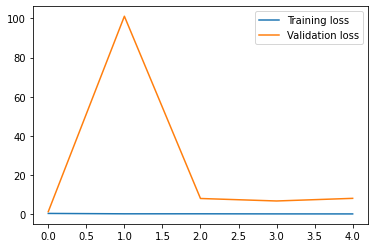

In [30]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [31]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [33]:
us_bd = CustomBusinessDay(calendar = USFederalHolidayCalendar())

In [37]:
n_past = 16
n_days_for_prediction = 15
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods = n_days_for_prediction, freq = us_bd).tolist()
print(predict_period_dates)

[Timestamp('2022-05-19 00:00:00', freq='C'), Timestamp('2022-05-20 00:00:00', freq='C'), Timestamp('2022-05-23 00:00:00', freq='C'), Timestamp('2022-05-24 00:00:00', freq='C'), Timestamp('2022-05-25 00:00:00', freq='C'), Timestamp('2022-05-26 00:00:00', freq='C'), Timestamp('2022-05-27 00:00:00', freq='C'), Timestamp('2022-05-31 00:00:00', freq='C'), Timestamp('2022-06-01 00:00:00', freq='C'), Timestamp('2022-06-02 00:00:00', freq='C'), Timestamp('2022-06-03 00:00:00', freq='C'), Timestamp('2022-06-06 00:00:00', freq='C'), Timestamp('2022-06-07 00:00:00', freq='C'), Timestamp('2022-06-08 00:00:00', freq='C'), Timestamp('2022-06-09 00:00:00', freq='C')]


In [38]:
 prediction = model.predict(trainX[-n_days_for_prediction:])

In [39]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [41]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [45]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [46]:
original = df[['Date','Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date']>= '2020-5-1']

<ipython-input-46-71f3fad86873>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


A:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
A:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Open'>

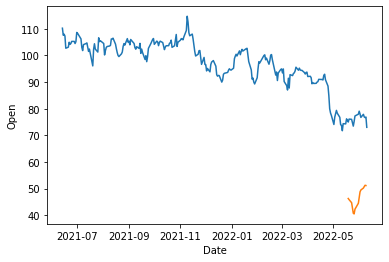

In [47]:
sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])